In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Setting path to import Csv files.
auto_insurance_to_load = Path("Resources/AutoInsurance.csv")
car_insurance_claim_to_load = Path("Resources/Car_Insurance_Claim.csv")
insurance_claims_to_load = Path("Resources/insurance_claims.csv")

# Reading CSV files and transforming into Dataframe.
auto_insurance_df = pd.read_csv(auto_insurance_to_load)
big_car_insurance_claim_df = pd.read_csv(car_insurance_claim_to_load)
big_insurance_claims_df = pd.read_csv(insurance_claims_to_load)



In [2]:
auto_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9135 non-null   object 
 1   State                          9135 non-null   object 
 2   Customer Lifetime Value        9135 non-null   float64
 3   Response                       9135 non-null   object 
 4   Coverage                       9135 non-null   object 
 5   Education                      9135 non-null   object 
 6   Effective To Date              9135 non-null   object 
 7   EmploymentStatus               9135 non-null   object 
 8   Gender                         9135 non-null   object 
 9   Income                         9135 non-null   int64  
 10  Location Code                  9135 non-null   object 
 11  Marital Status                 9135 non-null   object 
 12  Monthly Premium Auto           9135 non-null   i

In [90]:
unclean_auto_df =  auto_insurance_df[[
                            "State",
                            "Coverage",
                            "Education",
                            "Income",
                            "Months Since Policy Inception",
                            "Months Since Last Claim",
                            "Number of Policies",
                            "Marital Status",
                            "EmploymentStatus",
                            "Policy Type",
                            "Monthly Premium Auto",
                            "Total Claim Amount",
                            "Vehicle Class", 
                            "Vehicle Size"
                            ]]

auto_df = unclean_auto_df.drop(index=0)

income_df = auto_df.loc[auto_df["Income"] != 0]
income_df[["Income","Monthly Premium Auto","Total Claim Amount","Number of Policies","Months Since Policy Inception","Months Since Last Claim"]].corr()

auto_df

,State,Coverage,Education,Income,Months Since Policy Inception,Months Since Last Claim,Number of Policies,Marital Status,EmploymentStatus,Policy Type,Monthly Premium Auto,Total Claim Amount,Vehicle Class,Vehicle Size
1,Washington,Basic,Bachelor,56274,5,32,1,Married,Employed,Corporate Auto,69,384.811147,Two-Door Car,Medsize
2,Arizona,Extended,Bachelor,0,42,13,8,Single,Unemployed,Personal Auto,94,1131.464935,Four-Door Car,Medsize
3,Nevada,Premium,Bachelor,48767,38,18,2,Married,Employed,Personal Auto,108,566.472247,Two-Door Car,Medsize
4,California,Basic,Bachelor,0,65,18,7,Married,Unemployed,Corporate Auto,106,529.881344,SUV,Medsize
5,Washington,Basic,Bachelor,43836,44,12,1,Single,Employed,Personal Auto,73,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,California,Basic,Bachelor,71941,89,18,2,Married,Employed,Personal Auto,73,198.234764,Four-Door Car,Medsize
9131,California,Extended,College,21604,28,14,1,Divorced,Employed,Corporate Auto,79,379.200000,Four-Door Car,Medsize
9132,California,Extended,Bachelor,0,37,9,2,Single,Unemployed,Corporate Auto,85,790.784983,Four-Door Car,Medsize
9133,California,Extended,College,21941,3,34,3,Married,Employed,Personal Auto,96,691.200000,Four-Door Car,Large


# Vehicle Class

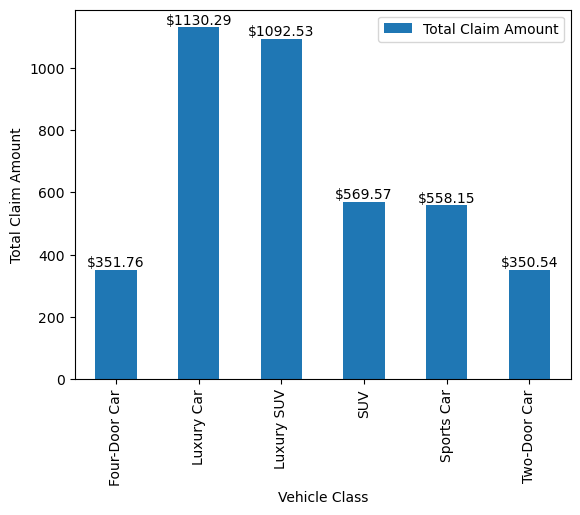

In [13]:
# Bar graph for mean total claim amount vs. Vehicle Class
grouped_df = pd.DataFrame(auto_df.groupby('Vehicle Class')['Total Claim Amount'].mean())
grouped_df = grouped_df.reset_index()
grouped_df

ax = grouped_df.plot("Vehicle Class", "Total Claim Amount", kind="bar", ylabel="Total Claim Amount")

for index, value in enumerate(grouped_df['Total Claim Amount']):
    ax.text(index, value, f"${value:.2f}", ha='center', va='bottom')

plt.show()

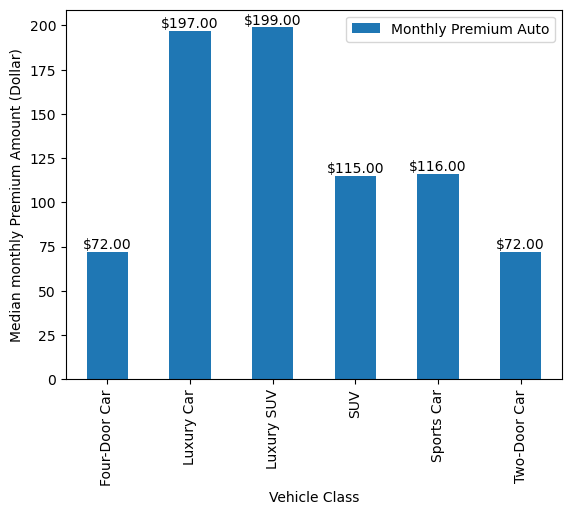

In [12]:
# Bar graph for Median total claim amount vs. Vehicle Class
grouped_df = pd.DataFrame(auto_df.groupby('Vehicle Class')['Monthly Premium Auto'].median())
grouped_df = grouped_df.reset_index()
grouped_df

ax = grouped_df.plot("Vehicle Class", "Monthly Premium Auto", kind="bar", ylabel="Median monthly Premium Amount (Dollar)")

for index, value in enumerate(grouped_df['Monthly Premium Auto']):
    ax.text(index, value, f"${value:.2f}", ha='center', va='bottom')
    
plt.show()

# Vehicle Size

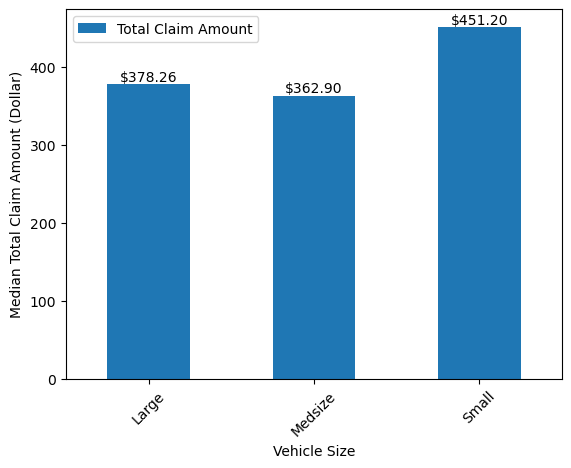

In [7]:
size_grouped_df = pd.DataFrame(auto_df.groupby('Vehicle Size')['Total Claim Amount'].median())
size_grouped_df.reset_index(inplace=True)

# Plotting the bar graph
ax = size_grouped_df.plot("Vehicle Size", "Total Claim Amount", kind="bar", ylabel="Median Total Claim Amount (Dollar)")
plt.xticks(rotation=45)

# Adding labels to the bars
for index, value in enumerate(size_grouped_df['Total Claim Amount']):
    ax.text(index, value, f"${value:.2f}", ha='center', va='bottom')

plt.show()

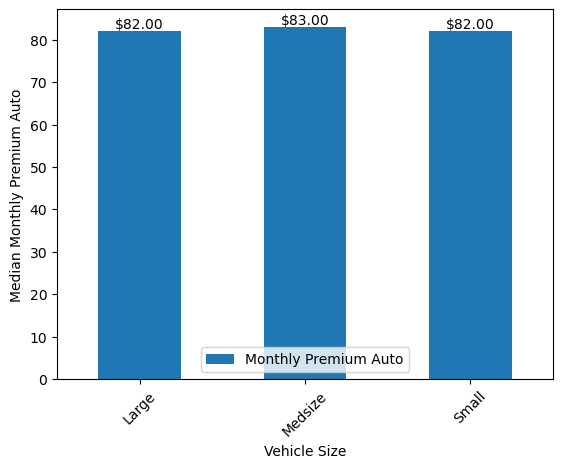

In [11]:
size_grouped_df = pd.DataFrame(auto_df.groupby('Vehicle Size')['Monthly Premium Auto'].median())
size_grouped_df.reset_index(inplace=True)

# Plotting the bar graph
ax = size_grouped_df.plot("Vehicle Size", "Monthly Premium Auto", kind="bar", ylabel="Median Monthly Premium Auto")
plt.xticks(rotation=45)

# Adding labels to the bars
for index, value in enumerate(size_grouped_df['Monthly Premium Auto']):
    ax.text(index, value, f"${value:.2f}", ha='center', va='bottom')

plt.show()

# Vehicle Class & Size vs Total Claim Amount/Monthly Premium Auto

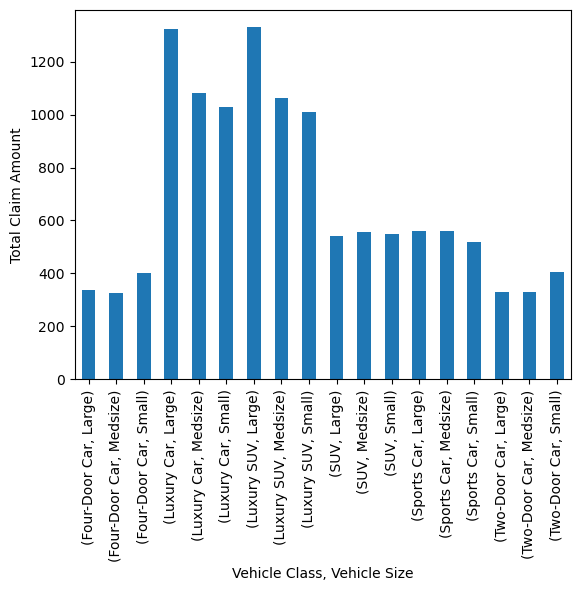

In [100]:
# Summary Graph for Vehicle Class & Size vs Total Claim Amount
size_class = auto_df.groupby(["Vehicle Class", "Vehicle Size"])["Total Claim Amount"].median()
size_class.plot(kind="bar", xlabel="Vehicle Class, Vehicle Size", ylabel="Total Claim Amount")
plt.show()

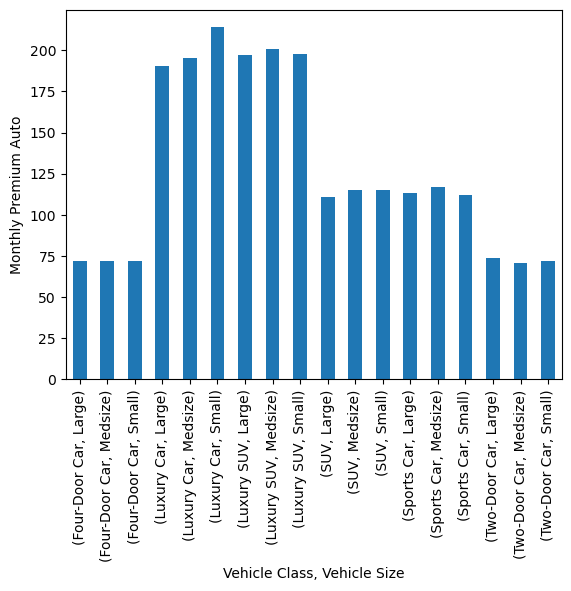

In [101]:
# Summary Graph for Vehicle Class & Size vs Monthly Premium Auto
size_class = auto_df.groupby(["Vehicle Class", "Vehicle Size"])["Monthly Premium Auto"].median()
size_class.plot(kind="bar", xlabel="Vehicle Class, Vehicle Size", ylabel="Monthly Premium Auto")
plt.show()